In [881]:
from sklearn import tree, svm, datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


import pandas as pd
import numpy as np
import json
import os
import shutil
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import random
from itertools import cycle
from scipy import interp
import mglearn ## Lirary from the book introduction to machine learning

%matplotlib inline

###### Methods Script
from methods import *

###### System
import sys
sys.path.append(".")

############ Black Jupyter Notebook ############
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
jtplot.reset()

Instructions to run the notebook locally

Please set the variable path_logs to the path where you want to access the .logs files to be converted to .json files and saved into the project logs directory


In [882]:
logs_folder_arr = [
    '/Users/igorlimarochaazevedo/Documents/Cellcrypt/logsSeafile/Logs/Sep2020/',
    '/Users/igorlimarochaazevedo/Documents/Cellcrypt/logsSeafile/Logs/Oct2020/',
    '/Users/igorlimarochaazevedo/Documents/Cellcrypt/logsSeafile/Logs/Nov2020/',
]

In [883]:
logs_seafile = []
for logs_folder in logs_folder_arr:
    logs_seafile += [dI for dI in os.listdir(logs_folder) if os.path.isdir(os.path.join(logs_folder,dI))]
print(logs_seafile)

['Sep 10th', 'Sep 14th', 'Sep25th', 'Sep22nd', 'Sep17th', 'Sep21st', 'Sep28th', 'Sep16th', 'Sep18th', 'Sep29th', 'Sep23rd', 'Sep15th', 'Sep30th', 'Sep11th', 'Sep24th', 'Sep 8th ', 'Sep 9th', 'Oct14th', 'Oct22nd', 'Oct9th', 'Oct19th', 'Oct13th', 'Oct21st', 'Oct7th', 'Oct28th', 'Oct26th', 'Oct8th', 'Oct16th', 'Oct6th', 'Oct23rd', 'Oct1st', 'OCt29th', 'Oct27th', 'Oct2nd', 'Oct5th', 'Oct30th', 'Oct15th', 'Oct20th', 'Nov4th', 'Nov3rd', 'Nov9th', 'Nov10th', 'Nov6th', 'Nov11th', 'Nov5th']


In [884]:
dst = './logs'
for i in logs_seafile:
    if i[0].lower() == 's':
        copyFiles(logs_folder_arr[0] + i, dst)
    elif i[0].lower() == 'o':
        copyFiles(logs_folder_arr[1] + i, dst)

Methods to obtain a list of unique logs 

In [885]:
generateJsonFromLog(dst)
deleteFilesEqualNames(dst)
list_logs = returnListJSON("./logs")
print(len(list_logs))

4329


Get log dataframe with general parameters

In [886]:
df_log = getLogDF(list_logs)
print(df_log.shape)
df_log.head()

(3666, 17)


,index,call_id,version,timestamp,log_session_id,type,address,alias,media_relay,duration,peer,client,status,rating,issue,comment,id
0,0,Z.-GrqPvQO-Pvah0boPABWkQcRRYCsRU,3.81.3,1602005429,9244F4FB-B634-4E42-BD74-7B477DEEFF00,1,187.115.50.159,jessicaschellysouza@gmail.com,turn-federal.cellcrypt.com:3478,0,jessica.souza@csghq.com,1,11,nan,nan,nan,NaN
1,0,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,1,189.4.81.95,rogerio.richa@cellcrypt.com,NaN,358,mark.currie@cellcrypt.com,0,7,nan,nan,nan,NaN
2,0,HG7yOzTIHO2rVD-DRAX6cy9CYutFzv.q,3.16.0,1602789699,C8458AB5-A33C-455C-BB7D-F46E84C60B28,1,179.83.30.199,joao.sabino@csghq.com,turn-federal.cellcrypt.com:3478,5,jpaulo_os@hotmail.com,1,7,nan,nan,nan,NaN
3,0,bobbi.such+andfed@csghq.com,101-3.131.0.3131000-FED,1599759351,NaN,1,174.248.27.4,adam.such+andrfed@csghq.com,NaN,1784,bobbi.such+andfed@csghq.com,0,7,nan,nan,nan,NaN
4,0,,3.97.0.43-CSGF,1603957451,f26e7c9a5fb8440e98dd71b55a7a6409,1,102.39.114.94,windows.fed.dev@cellcrypt.com,turn-federal.cellcrypt.com:3478,8,,2,7,nan,nan,nan,NaN


In [887]:
def getNaNInfo(df):
    print('- Is there any NaN? ', df.isnull().values.any())
    print('- How many? ', df.isnull().sum().sum())
    print('- Which columns? ')
    for col in df.columns:
        if df[col].isnull().values.any():
            print('Col: {} || How many: {}'.format(col, df[col].isnull().sum().sum()))

In [888]:
getNaNInfo(df_log)

- Is there any NaN?  True
- How many?  8260
- Which columns? 
Col: call_id || How many: 287
Col: log_session_id || How many: 1117
Col: address || How many: 316
Col: alias || How many: 287
Col: media_relay || How many: 2304
Col: peer || How many: 287
Col: id || How many: 3662


In [889]:
df_log_new_version = getLogDFNewVersion(list_logs)
print(df_log_new_version.shape)
df_log_new_version.head()

(2549, 13)


,index,call_id,version,timestamp,log_session_id,type,address,alias,media_relay,duration,peer,client,status
0,0,Z.-GrqPvQO-Pvah0boPABWkQcRRYCsRU,3.81.3,1602005429,9244F4FB-B634-4E42-BD74-7B477DEEFF00,1,187.115.50.159,jessicaschellysouza@gmail.com,turn-federal.cellcrypt.com:3478,0,jessica.souza@csghq.com,1,11
1,0,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,1,189.4.81.95,rogerio.richa@cellcrypt.com,NaN,358,mark.currie@cellcrypt.com,0,7
2,0,HG7yOzTIHO2rVD-DRAX6cy9CYutFzv.q,3.16.0,1602789699,C8458AB5-A33C-455C-BB7D-F46E84C60B28,1,179.83.30.199,joao.sabino@csghq.com,turn-federal.cellcrypt.com:3478,5,jpaulo_os@hotmail.com,1,7
3,0,,3.97.0.43-CSGF,1603957451,f26e7c9a5fb8440e98dd71b55a7a6409,1,102.39.114.94,windows.fed.dev@cellcrypt.com,turn-federal.cellcrypt.com:3478,8,,2,7
4,0,windows_daily_standup,3.138.1,1603797308,2714f7c9-e4a7-4d5f-8b96-d1814fdf0278,1,177.25.249.143,fabio.ohtsuki+andfed@csghq.com,NaN,340,windows_daily_standup,0,7


The two following cells will be used to join the stats dataframe into the log dataframe

In [890]:
df_call_feedback = readCallRating(list_logs)
print(df_call_feedback.shape)
df_call_feedback.head()

(655, 5)


,index,log_session_id,rating,issue,comment
0,0,3c88a3fa-61af-4075-b2e4-05ec3e6362b9,1.0,NaN,NaN
1,0,10a67886-c9d7-41c4-9268-d143bea364d9,5.0,NaN,NaN
2,0,7b6fe3fd-2dbc-4129-80ff-963e2723cf5c,5.0,NaN,NaN
3,0,54fae341-09b8-45b6-aed0-b0586aef4a3a,5.0,NaN,NaN
4,0,4c0e7338-35f4-4770-834b-0b105f032849,5.0,NaN,NaN


In [891]:
df_log = joinCallFeedBackDfLog(df_call_feedback, df_log)
print(df_log.shape)
df_log.head()

(3666, 17)


,index,call_id,version,timestamp,log_session_id,type,address,alias,media_relay,duration,peer,client,status,rating,issue,comment,id
0,0,Z.-GrqPvQO-Pvah0boPABWkQcRRYCsRU,3.81.3,1602005429,9244F4FB-B634-4E42-BD74-7B477DEEFF00,1,187.115.50.159,jessicaschellysouza@gmail.com,turn-federal.cellcrypt.com:3478,0,jessica.souza@csghq.com,1,11,nan,nan,nan,NaN
1,0,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,1,189.4.81.95,rogerio.richa@cellcrypt.com,NaN,358,mark.currie@cellcrypt.com,0,7,2,5,5 min issue,NaN
2,0,HG7yOzTIHO2rVD-DRAX6cy9CYutFzv.q,3.16.0,1602789699,C8458AB5-A33C-455C-BB7D-F46E84C60B28,1,179.83.30.199,joao.sabino@csghq.com,turn-federal.cellcrypt.com:3478,5,jpaulo_os@hotmail.com,1,7,nan,nan,nan,NaN
3,0,bobbi.such+andfed@csghq.com,101-3.131.0.3131000-FED,1599759351,NaN,1,174.248.27.4,adam.such+andrfed@csghq.com,NaN,1784,bobbi.such+andfed@csghq.com,0,7,nan,nan,nan,NaN
4,0,,3.97.0.43-CSGF,1603957451,f26e7c9a5fb8440e98dd71b55a7a6409,1,102.39.114.94,windows.fed.dev@cellcrypt.com,turn-federal.cellcrypt.com:3478,8,,2,7,5,0,,NaN


In [892]:
print('Amount of calls that have rating equal to nan: ', 
      df_log[df_log['rating'] == 'nan'].shape[0])

Amount of calls that have rating equal to nan:  2939


In [893]:
df_log_new_version = joinCallFeedBackDfLog(df_call_feedback, df_log_new_version)
print(df_log_new_version.shape)
df_log_new_version.head()

(2549, 16)


,index,call_id,version,timestamp,log_session_id,type,address,alias,media_relay,duration,peer,client,status,rating,issue,comment
0,0,Z.-GrqPvQO-Pvah0boPABWkQcRRYCsRU,3.81.3,1602005429,9244F4FB-B634-4E42-BD74-7B477DEEFF00,1,187.115.50.159,jessicaschellysouza@gmail.com,turn-federal.cellcrypt.com:3478,0,jessica.souza@csghq.com,1,11,NaN,NaN,NaN
1,0,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,1,189.4.81.95,rogerio.richa@cellcrypt.com,NaN,358,mark.currie@cellcrypt.com,0,7,2.0,5.0,5 min issue
2,0,HG7yOzTIHO2rVD-DRAX6cy9CYutFzv.q,3.16.0,1602789699,C8458AB5-A33C-455C-BB7D-F46E84C60B28,1,179.83.30.199,joao.sabino@csghq.com,turn-federal.cellcrypt.com:3478,5,jpaulo_os@hotmail.com,1,7,NaN,NaN,NaN
3,0,,3.97.0.43-CSGF,1603957451,f26e7c9a5fb8440e98dd71b55a7a6409,1,102.39.114.94,windows.fed.dev@cellcrypt.com,turn-federal.cellcrypt.com:3478,8,,2,7,5.0,0.0,
4,0,windows_daily_standup,3.138.1,1603797308,2714f7c9-e4a7-4d5f-8b96-d1814fdf0278,1,177.25.249.143,fabio.ohtsuki+andfed@csghq.com,NaN,340,windows_daily_standup,0,7,5.0,NaN,nan


In [894]:
print('Amount of calls that have rating equal to nan: ', 
      df_log_new_version[df_log_new_version['rating'] == 'nan'].shape[0])
print('Amount of calls that have rating equal to NaN: ', 
      df_log_new_version[df_log_new_version['rating'] == np.nan].shape[0])
getNaNInfo(df_log_new_version)

Amount of calls that have rating equal to nan:  0
Amount of calls that have rating equal to NaN:  0
- Is there any NaN?  True
- How many?  7461
- Which columns? 
Col: address || How many: 26
Col: media_relay || How many: 1199
Col: rating || How many: 1981
Col: issue || How many: 2278
Col: comment || How many: 1977


/Users/igorlimarochaazevedo/Documents/Cellcrypt/machineLearningCallEvaluation/venv_ML_CSG/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [895]:
df_log_new_version.groupby('status').count()

,index,call_id,version,timestamp,log_session_id,type,address,alias,media_relay,duration,peer,client,rating,issue,comment
status,,,,,,,,,,,,,,,
0,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2
1,8,8,8,8,8,8,8,8,8,8,8,8,0,0,0
2,42,42,42,42,42,42,33,42,42,42,42,42,0,0,0
5,47,47,47,47,47,47,43,47,47,47,47,47,1,0,1
7,1801,1801,1801,1801,1801,1801,1795,1801,996,1801,1801,1801,550,265,554
8,31,31,31,31,31,31,31,31,31,31,31,31,0,0,0
11,618,618,618,618,618,618,611,618,225,618,618,618,15,4,15


### Artificial rating for Status == 5

The status in our `df_log` dataset are in its majority 7. Which mean *End call (success)*, and consequently they are our first source of data for the machine learning model. However, status 5 - *Error* - should be considered as well with rating equal to 0 (zero) since a error has happened. The other status should not be considered, since they do not indicate any problem. They are simply telling that a call did not was established succesfully due to something other than an error.

In [896]:
df_seven = df_log_new_version.loc[df_log_new_version['status'] == 7]
print(df_seven.shape)
df_five = df_log_new_version.loc[df_log_new_version['status'] == 5]
print(df_five.shape)
df_log_new_version = pd.concat([df_seven, df_five])
print(df_log_new_version.shape)


## We need to complete the data with zeros for status = 5
df_log_new_version['rating'] = np.where((df_log_new_version.status == 5),\
                                        0, df_log_new_version.rating)


list_log_session_id_one = df_log_new_version['log_session_id'].unique().tolist()
print(len(df_log_new_version['log_session_id'].unique().tolist()))
df_log_new_version.head()

(1801, 16)
(47, 16)
(1848, 16)
1848


,index,call_id,version,timestamp,log_session_id,type,address,alias,media_relay,duration,peer,client,status,rating,issue,comment
1,0,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,1,189.4.81.95,rogerio.richa@cellcrypt.com,NaN,358,mark.currie@cellcrypt.com,0,7,2.0,5.0,5 min issue
2,0,HG7yOzTIHO2rVD-DRAX6cy9CYutFzv.q,3.16.0,1602789699,C8458AB5-A33C-455C-BB7D-F46E84C60B28,1,179.83.30.199,joao.sabino@csghq.com,turn-federal.cellcrypt.com:3478,5,jpaulo_os@hotmail.com,1,7,NaN,NaN,NaN
3,0,,3.97.0.43-CSGF,1603957451,f26e7c9a5fb8440e98dd71b55a7a6409,1,102.39.114.94,windows.fed.dev@cellcrypt.com,turn-federal.cellcrypt.com:3478,8,,2,7,5.0,0.0,
4,0,windows_daily_standup,3.138.1,1603797308,2714f7c9-e4a7-4d5f-8b96-d1814fdf0278,1,177.25.249.143,fabio.ohtsuki+andfed@csghq.com,NaN,340,windows_daily_standup,0,7,5.0,NaN,nan
6,0,gykJkOeCmkyN6iFQ4P0adpKL0LRVzgSf,3.16.0,1601477233,C033C4C0-FC24-48C4-A27F-ADC1FE9EC63C,1,189.114.198.86,joao.sabino@csghq.com,turn-federal.cellcrypt.com:3478,0,jpaulo_os@hotmail.com,1,7,NaN,NaN,NaN


Average Rating per alias

In [897]:
def getRatingPerAlias(df_log):
    df_alias_NV = df_log.groupby('alias').count()
    df_alias_NV['total_calls'] = df_log.groupby('alias').count()['index']
    df_ = df_log[df_log['rating'].notna()]
    df_alias_NV['total_calls_w_rating'] = df_.groupby('alias').count()['index']
    df_alias_NV['total_calls_w_rating'].fillna(0, inplace=True)
    print(df_alias_NV.shape)
    print('Total ratings provided: ', df_alias_NV['total_calls_w_rating'].sum())
    df_alias_NV = df_alias_NV[['total_calls', 'total_calls_w_rating']]
    df_alias_NV = df_alias_NV.sort_values(by=['total_calls_w_rating'])
    
    return df_alias_NV

df_alias_rating = getRatingPerAlias(df_log_new_version)
df_alias_rating

(60, 17)
Total ratings provided:  597.0


,total_calls,total_calls_w_rating
alias,,
andre.puel@cellcrypt.com,3,0.0
auto.alice@csghq.com,19,0.0
mark.currie@cellcrypt.com,2,0.0
bobbi.such+andfed@csghq.com,1,0.0
bruno.nascimento@csghq.com,1,0.0
delta@csghq.com,7,0.0
eric+iosfedipad@csghq.com,7,0.0
jessica_schelly@hotmail.com,15,0.0
j.paulo-os@hotmail.com,2,0.0


In [898]:
def plotHowMany(df_alias_rating):
    alias_arr = getAliasArr(df_alias_rating.reset_index())
            
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=alias_arr,
        y=df_alias_rating['total_calls'],
        name='How many calls were made',
        marker_color='indianred'
    ))
    
    fig.add_trace(go.Bar(
        x=alias_arr,
        y=df_alias_rating['total_calls_w_rating'],
        name='How many calls with rating provided',
        marker_color='lightsalmon'
    ))

    fig.update_layout(title_text="Calls made per ratings provided")
    fig.show()
plotHowMany(df_alias_rating)

Dataframes used to keep call informations through time

PS: It is crucial to note that this dataframe will contain data from both version of log files. In other words, it will contain data from the version that does not define rating properly and from the version that does define rating with two files for each call made.


In [899]:
df_call_parameters = genCallParametersDF(list_logs)
print(df_call_parameters.shape)
df_call_parameters.head()

(782674, 14)


,index,alias,timestamp,status,address,version,call_id,log_session_id,time,latency,jitter_rx,jitter_tx,packet_loss_rx,packet_loss_tx
0,0,rogerio.richa@cellcrypt.com,1601485003,7,189.4.81.95,3.135.0,mark.currie@cellcrypt.com,2f64e729-02dd-4dda-85a5-1f662802b746,0.0,0.0,0.0,0.0,100.0,0.0
1,1,rogerio.richa@cellcrypt.com,1601485003,7,189.4.81.95,3.135.0,mark.currie@cellcrypt.com,2f64e729-02dd-4dda-85a5-1f662802b746,1.0,0.0,0.0,0.0,100.0,0.0
2,2,rogerio.richa@cellcrypt.com,1601485003,7,189.4.81.95,3.135.0,mark.currie@cellcrypt.com,2f64e729-02dd-4dda-85a5-1f662802b746,2.0,0.0,0.0,0.0,100.0,0.0
3,3,rogerio.richa@cellcrypt.com,1601485003,7,189.4.81.95,3.135.0,mark.currie@cellcrypt.com,2f64e729-02dd-4dda-85a5-1f662802b746,3.0,122.0,8.0,0.0,0.0,0.0
4,4,rogerio.richa@cellcrypt.com,1601485003,7,189.4.81.95,3.135.0,mark.currie@cellcrypt.com,2f64e729-02dd-4dda-85a5-1f662802b746,4.0,122.0,12.0,0.0,1.0,0.0


In [900]:
def genCallParametersDFNewVersion(list_logs):
    '''This method does the same thing as its previous version - genCallParametersDF.
    However, it will only contain occurences for the new version.'''
    
    out_str = ''
    
    df = pd.DataFrame()
    frames = []
    k = 0
    for i in range(len(list_logs)):
        with open(list_logs[i]) as f:
            try:
                file_json = json.load(f)
                df_if = pd.json_normalize(file_json)
                
                if 'log_session_id' in df_if.columns:
                    
                    df_json = pd.json_normalize(file_json['data'])
                    if df_json.empty:
                        df_if = df_if.drop(['data'], axis=1)
                        df_if['status'] = file_json['status']
                        df_if['alias'] = file_json['alias']
                        df_if['timestamp'] = file_json['timestamp']
                        df_if['call_id'] = file_json['call_id']
                        df_if['log_session_id'] = file_json['log_session_id']
                        try:
                            df_if['address'] = file_json['address']
                        except:
                            df_if['address'] = 0
                        df_if['version'] = file_json['version']
                        df_if['duration'] = file_json['duration']
                        df_if['client'] = file_json['client']
                    
                        df_if['time'] = 0
                        df_if['latency'] = 0
                        df_if['jitter_rx'] = 0
                        df_if['jitter_tx'] = 0
                        df_if['packet_loss_rx'] = 0
                        df_if['packet_loss_tx'] = 0
                        
                        df = pd.concat([df_json, df_if])
                        frames.append(df)
                    else:
                        df_json['status'] = file_json['status']
                        df_json['alias'] = file_json['alias']
                        df_json['timestamp'] = file_json['timestamp']
                        df_json['call_id'] = file_json['call_id']
                        df_json['log_session_id'] = file_json['log_session_id']
                        try:
                            df_if['address'] = file_json['address']
                        except:
                            df_if['address'] = 0
                        df_json['address'] = 0
                        df_json['version'] = file_json['version']
                        df_json['duration'] = file_json['duration']
                        df_json['client'] = file_json['client']

                        df = pd.concat([df_json, df_if])
                        frames.append(df)
            except Exception as e:
                if 'rating' not in list_logs[i]:
                    out_str += str(i) + '\t'
                    out_str += str(list_logs[i]) + '\t' + str(e) + '\n'
    
    print(out_str)
    df = pd.concat(frames)
    df = df.reset_index()
    
    return df

In [901]:
df_call_parameters_NV = genCallParametersDFNewVersion(list_logs)

143	./logs/activity-160199075801027449940357867800.json	Expecting value: line 1 column 1 (char 0)
880	./logs/activity-1600091491781361183830308613300.json	Expecting value: line 1 column 1 (char 0)



In [902]:
df_call_parameters_NV = df_call_parameters_NV.drop(['data'], axis=1)
print(df_call_parameters_NV.shape)
list_log_session_id_two = df_call_parameters_NV['log_session_id'].unique().tolist()
print(len(list_log_session_id_two))
df_call_parameters_NV.head()

(584146, 19)
2549


,index,call_id,version,timestamp,log_session_id,type,address,alias,media_relay,duration,peer,client,status,time,latency,jitter_rx,jitter_tx,packet_loss_rx,packet_loss_tx
0,0,Z.-GrqPvQO-Pvah0boPABWkQcRRYCsRU,3.81.3,1602005429,9244F4FB-B634-4E42-BD74-7B477DEEFF00,1.0,187.115.50.159,jessicaschellysouza@gmail.com,turn-federal.cellcrypt.com:3478,0,jessica.souza@csghq.com,1,11,0.0,0.0,0.0,0.0,0.0,0.0
1,0,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,NaN,0,rogerio.richa@cellcrypt.com,NaN,358,NaN,0,7,0.0,0.0,0.0,0.0,100.0,0.0
2,1,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,NaN,0,rogerio.richa@cellcrypt.com,NaN,358,NaN,0,7,1.0,0.0,0.0,0.0,100.0,0.0
3,2,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,NaN,0,rogerio.richa@cellcrypt.com,NaN,358,NaN,0,7,2.0,0.0,0.0,0.0,100.0,0.0
4,3,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,NaN,0,rogerio.richa@cellcrypt.com,NaN,358,NaN,0,7,3.0,122.0,8.0,0.0,0.0,0.0


In [903]:
getNaNInfo(df_call_parameters_NV)

- Is there any NaN?  True
- How many?  1756742
- Which columns? 
Col: type || How many: 581597
Col: media_relay || How many: 582796
Col: peer || How many: 581597
Col: time || How many: 1792
Col: latency || How many: 1792
Col: jitter_rx || How many: 1792
Col: jitter_tx || How many: 1792
Col: packet_loss_rx || How many: 1792
Col: packet_loss_tx || How many: 1792


Finding values that exist in list_log_session_id_one but but does not exist in list_log_session_id_two

In [904]:
print(len(list_log_session_id_one))
print(len(list_log_session_id_two))
diff = []
for el in list_log_session_id_one:
    if el not in list_log_session_id_two:
        diff.append(el)

print(len(diff))

1848
2549
0


In [905]:
df_diff = df_log_new_version.loc[df_log_new_version.log_session_id.isin(diff)]
df_diff.tail()

,index,call_id,version,timestamp,log_session_id,type,address,alias,media_relay,duration,peer,client,status,rating,issue,comment


It is possible to see from the dataframe above that the calls with status equal to 5 don't have technical informations (latency, jitter_rx, etc). For that reasom, some parameters 
need to be added in order to don't lose these data.

In [906]:
df_call_parameters_NV

,index,call_id,version,timestamp,log_session_id,type,address,alias,media_relay,duration,peer,client,status,time,latency,jitter_rx,jitter_tx,packet_loss_rx,packet_loss_tx
0,0,Z.-GrqPvQO-Pvah0boPABWkQcRRYCsRU,3.81.3,1602005429,9244F4FB-B634-4E42-BD74-7B477DEEFF00,1.0,187.115.50.159,jessicaschellysouza@gmail.com,turn-federal.cellcrypt.com:3478,0,jessica.souza@csghq.com,1,11,0.0,0.0,0.0,0.0,0.0,0.0
1,0,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,NaN,0,rogerio.richa@cellcrypt.com,NaN,358,NaN,0,7,0.0,0.0,0.0,0.0,100.0,0.0
2,1,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,NaN,0,rogerio.richa@cellcrypt.com,NaN,358,NaN,0,7,1.0,0.0,0.0,0.0,100.0,0.0
3,2,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,NaN,0,rogerio.richa@cellcrypt.com,NaN,358,NaN,0,7,2.0,0.0,0.0,0.0,100.0,0.0
4,3,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,NaN,0,rogerio.richa@cellcrypt.com,NaN,358,NaN,0,7,3.0,122.0,8.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584141,5,2lnbqPTfWRlV1DbkMu0qfLXBaBHdzkLg,3.16.0,1601468880,00630ACC-B3AA-4E8B-B24D-75C6BDCE9F36,NaN,0,jpaulo_os@hotmail.com,NaN,9,NaN,1,7,6.0,5.0,4.0,2.0,0.0,0.0
584142,6,2lnbqPTfWRlV1DbkMu0qfLXBaBHdzkLg,3.16.0,1601468880,00630ACC-B3AA-4E8B-B24D-75C6BDCE9F36,NaN,0,jpaulo_os@hotmail.com,NaN,9,NaN,1,7,7.0,5.0,4.0,2.0,0.0,0.0
584143,7,2lnbqPTfWRlV1DbkMu0qfLXBaBHdzkLg,3.16.0,1601468880,00630ACC-B3AA-4E8B-B24D-75C6BDCE9F36,NaN,0,jpaulo_os@hotmail.com,NaN,9,NaN,1,7,8.0,5.0,4.0,2.0,0.0,0.0
584144,8,2lnbqPTfWRlV1DbkMu0qfLXBaBHdzkLg,3.16.0,1601468880,00630ACC-B3AA-4E8B-B24D-75C6BDCE9F36,NaN,0,jpaulo_os@hotmail.com,NaN,9,NaN,1,7,9.0,5.0,4.0,2.0,0.0,0.0


The dataframes with ML at the end of the variable will only contain data with rating different than NaN. For that reason, please note that the shape of this dataframe is smaller than the other one

In [907]:
df_logs_ML = df_log_new_version.copy()
df_logs_ML = df_logs_ML[df_logs_ML['rating'].notna()]
print(df_logs_ML.shape)
getNaNInfo(df_logs_ML)   
df_logs_ML.head()

(597, 16)
- Is there any NaN?  True
- How many?  640
- Which columns? 
Col: address || How many: 6
Col: media_relay || How many: 256
Col: issue || How many: 332
Col: comment || How many: 46


,index,call_id,version,timestamp,log_session_id,type,address,alias,media_relay,duration,peer,client,status,rating,issue,comment
1,0,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,1,189.4.81.95,rogerio.richa@cellcrypt.com,NaN,358,mark.currie@cellcrypt.com,0,7,2.0,5.0,5 min issue
3,0,,3.97.0.43-CSGF,1603957451,f26e7c9a5fb8440e98dd71b55a7a6409,1,102.39.114.94,windows.fed.dev@cellcrypt.com,turn-federal.cellcrypt.com:3478,8,,2,7,5.0,0.0,
4,0,windows_daily_standup,3.138.1,1603797308,2714f7c9-e4a7-4d5f-8b96-d1814fdf0278,1,177.25.249.143,fabio.ohtsuki+andfed@csghq.com,NaN,340,windows_daily_standup,0,7,5.0,NaN,nan
7,0,824624,3.99.0.50-CSGF,1603196131,5212822e2c9c4eb18004710a7e64a729,1,189.4.81.95,rogerio.richa+win@cellcrypt.com,turn-federal.cellcrypt.com:3478,1711,team_c,2,7,5.0,0.0,
9,0,adam.such+andrfed@csghq.com,3.138.0,1603208995,1e54a2c3-d9fd-4b38-b152-911bdfa62341,1,105.232.65.25,harvey+andfed@csghq.com,NaN,316,adam.such+andrfed@csghq.com,0,7,5.0,NaN,nan


Fixing NAN values on df_logs_ML

In [908]:
df_logs_ML['issue'].fillna(0, inplace=True)
df_logs_ML['address'].fillna(0, inplace=True)
df_logs_ML['media_relay'].fillna(0, inplace=True)
getNaNInfo(df_logs_ML)   
print(df_logs_ML.shape)
df_logs_ML.head()

- Is there any NaN?  True
- How many?  46
- Which columns? 
Col: comment || How many: 46
(597, 16)


,index,call_id,version,timestamp,log_session_id,type,address,alias,media_relay,duration,peer,client,status,rating,issue,comment
1,0,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,1,189.4.81.95,rogerio.richa@cellcrypt.com,0,358,mark.currie@cellcrypt.com,0,7,2.0,5.0,5 min issue
3,0,,3.97.0.43-CSGF,1603957451,f26e7c9a5fb8440e98dd71b55a7a6409,1,102.39.114.94,windows.fed.dev@cellcrypt.com,turn-federal.cellcrypt.com:3478,8,,2,7,5.0,0.0,
4,0,windows_daily_standup,3.138.1,1603797308,2714f7c9-e4a7-4d5f-8b96-d1814fdf0278,1,177.25.249.143,fabio.ohtsuki+andfed@csghq.com,0,340,windows_daily_standup,0,7,5.0,0.0,nan
7,0,824624,3.99.0.50-CSGF,1603196131,5212822e2c9c4eb18004710a7e64a729,1,189.4.81.95,rogerio.richa+win@cellcrypt.com,turn-federal.cellcrypt.com:3478,1711,team_c,2,7,5.0,0.0,
9,0,adam.such+andrfed@csghq.com,3.138.0,1603208995,1e54a2c3-d9fd-4b38-b152-911bdfa62341,1,105.232.65.25,harvey+andfed@csghq.com,0,316,adam.such+andrfed@csghq.com,0,7,5.0,0.0,nan


In [909]:
def filterThresholdLimit(df_log, min_minutes):
    df_log = df_log.copy()
    
    alias_arr = getAliasArr(df_log.reset_index())
    arr_calls_less_than_min = dict()
    for alias in alias_arr:
        arr_calls_less_than_min[alias] = 0
    
    df_log = df_log.copy()
    df_log = df_log.loc[df_log['status'] == 7]
    df_log.set_index('log_session_id', inplace=True)
    df_calls_higher_than_min = df_log.loc[df_log['duration'] >= min_minutes*60]

    return df_calls_higher_than_min

def applyFilter(df_log_in, min_minutes, df_log_new_version):
    df_log = df_log_in.copy()
    
    log_id_arr =  filterThresholdLimit(df_log, min_minutes).index.tolist()
    df = df_log.loc[df_log.log_session_id.isin(log_id_arr)]
    print('df_log - ', df_log.shape)
    print('df - ', df.shape)
    df_log_ = df_log_new_version.loc[df_log_new_version['status'] == 5]
    print('df_log_ - ', df_log_.shape)
    df = pd.concat([df, df_log_])
    
    return df, df_log.loc[df_log.log_session_id.isin(log_id_arr)]

min_minutes = 45/60
print('df_logs_ML - ', df_logs_ML.shape)
df_logs_ML, df_logs_ML_NOT = applyFilter(df_logs_ML, min_minutes, df_log_new_version)
print('df_logs_ML - ', df_logs_ML.shape)
df_logs_ML.head()

df_logs_ML -  (597, 16)
df_log -  (597, 16)
df -  (414, 16)
df_log_ -  (47, 16)
df_logs_ML -  (461, 16)


,index,call_id,version,timestamp,log_session_id,type,address,alias,media_relay,duration,peer,client,status,rating,issue,comment
1,0,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,1,189.4.81.95,rogerio.richa@cellcrypt.com,0,358,mark.currie@cellcrypt.com,0,7,2.0,5.0,5 min issue
4,0,windows_daily_standup,3.138.1,1603797308,2714f7c9-e4a7-4d5f-8b96-d1814fdf0278,1,177.25.249.143,fabio.ohtsuki+andfed@csghq.com,0,340,windows_daily_standup,0,7,5.0,0.0,nan
7,0,824624,3.99.0.50-CSGF,1603196131,5212822e2c9c4eb18004710a7e64a729,1,189.4.81.95,rogerio.richa+win@cellcrypt.com,turn-federal.cellcrypt.com:3478,1711,team_c,2,7,5.0,0.0,
9,0,adam.such+andrfed@csghq.com,3.138.0,1603208995,1e54a2c3-d9fd-4b38-b152-911bdfa62341,1,105.232.65.25,harvey+andfed@csghq.com,0,316,adam.such+andrfed@csghq.com,0,7,5.0,0.0,nan
11,0,fabio.ohtsuki+andfed@csghq.com,3.138.0,1603113086,c556935d-d6cd-49b0-939e-3dada56551d8,1,41.182.199.159,harvey+andfed@csghq.com,0,1042,fabio.ohtsuki+andfed@csghq.com,0,7,5.0,0.0,nan


In [910]:
print(df_logs_ML.loc[df_logs_ML['duration'] < 45].shape)
print(df_logs_ML.loc[df_logs_ML['status'] == 5].shape)

(46, 16)
(47, 16)


In [911]:
df_logs_ML.groupby('status').count()

,index,call_id,version,timestamp,log_session_id,type,address,alias,media_relay,duration,peer,client,rating,issue,comment
status,,,,,,,,,,,,,,,
5,47,47,47,47,47,47,43,47,47,47,47,47,47,0,1
7,414,414,414,414,414,414,414,414,414,414,414,414,414,414,414


Code to search for specific log_session_id

In [912]:
def getOccurence_log_session_id(df, log_session_id):
    return df[df['log_session_id'] == log_session_id]
getOccurence_log_session_id(df_call_parameters, 'eabb46d0-4a7c-4712-af32-db79e20726d0')

,index,alias,timestamp,status,address,version,call_id,log_session_id,time,latency,jitter_rx,jitter_tx,packet_loss_rx,packet_loss_tx


In [913]:
def getLogSessionIDArr(df):
    log_session_arr = []
    for log_session in df['log_session_id'].tolist():
        if log_session not in log_session_arr:
            log_session_arr.append(log_session.replace(' ', ''))
    return np.array(log_session_arr)
log_session_arr = getLogSessionIDArr(df_logs_ML)
print(len(log_session_arr))

461


In [914]:
def getDFParametersML(df_call_parameters, log_session_arr, not_in = ''):
    df = df_call_parameters.copy()
    df.columns = df.columns.str.replace(' ', '')
    if not_in == 'y':
        return df[~df['log_session_id'].isin(log_session_arr)]
    return df[df['log_session_id'].isin(log_session_arr)]

df_call_parameters_ML = getDFParametersML(df_call_parameters_NV, log_session_arr)
print(df_call_parameters_ML.shape)
print('The amount of log_session_id should be same size as log_session_arr: {} | {}'.format(
    len(df_call_parameters_ML['log_session_id'].unique().tolist()),
    len(log_session_arr) == len(df_call_parameters_ML['log_session_id'].unique().tolist())))

getNaNInfo(df_call_parameters_ML)        
print(df_call_parameters_ML.shape)
df_call_parameters_ML.head()

(294108, 19)
The amount of log_session_id should be same size as log_session_arr: 461 | True
- Is there any NaN?  True
- How many?  883649
- Which columns? 
Col: type || How many: 293647
Col: media_relay || How many: 293865
Col: peer || How many: 293647
Col: time || How many: 415
Col: latency || How many: 415
Col: jitter_rx || How many: 415
Col: jitter_tx || How many: 415
Col: packet_loss_rx || How many: 415
Col: packet_loss_tx || How many: 415
(294108, 19)


,index,call_id,version,timestamp,log_session_id,type,address,alias,media_relay,duration,peer,client,status,time,latency,jitter_rx,jitter_tx,packet_loss_rx,packet_loss_tx
1,0,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,NaN,0,rogerio.richa@cellcrypt.com,NaN,358,NaN,0,7,0.0,0.0,0.0,0.0,100.0,0.0
2,1,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,NaN,0,rogerio.richa@cellcrypt.com,NaN,358,NaN,0,7,1.0,0.0,0.0,0.0,100.0,0.0
3,2,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,NaN,0,rogerio.richa@cellcrypt.com,NaN,358,NaN,0,7,2.0,0.0,0.0,0.0,100.0,0.0
4,3,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,NaN,0,rogerio.richa@cellcrypt.com,NaN,358,NaN,0,7,3.0,122.0,8.0,0.0,0.0,0.0
5,4,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,NaN,0,rogerio.richa@cellcrypt.com,NaN,358,NaN,0,7,4.0,122.0,12.0,0.0,1.0,0.0


In [915]:
df_ML_mean = df_call_parameters_ML.groupby('log_session_id').mean()[['latency', 
                                                        'jitter_tx',
                                                        'jitter_rx',
                                                        'packet_loss_tx',
                                                        'packet_loss_rx']]
df_ML_mean.columns = ['latency_avg', 'jitter_tx_avg', 'jitter_rx_avg', 
                             'packet_loss_tx_avg', 'packet_loss_rx_avg']
df_ML_mean.reset_index(inplace=True)
print('Is there any NaN? ', df_ML_mean.isnull().values.any())
print(df_ML_mean.shape)

Is there any NaN?  False
(461, 6)


In [916]:
df_ML_median = df_call_parameters_ML.groupby('log_session_id').median()[['latency', 
                                                        'jitter_tx',
                                                        'jitter_rx',
                                                        'packet_loss_tx',
                                                        'packet_loss_rx']]
df_ML_median.columns = ['latency_median', 'jitter_tx_median', 'jitter_rx_median', 
                             'packet_loss_tx_median', 'packet_loss_rx_median']
df_ML_median.reset_index(inplace=True)
print('Is there any NaN? ', df_ML_median.isnull().values.any())
print(df_ML_median.shape)

Is there any NaN?  False
(461, 6)


In [917]:
df_ML_std = df_call_parameters_ML.groupby('log_session_id').std()[['latency', 
                                                        'jitter_tx',
                                                        'jitter_rx',
                                                        'packet_loss_tx',
                                                        'packet_loss_rx']]
df_ML_std.columns = ['latency_std', 'jitter_tx_std', 'jitter_rx_std', 
                             'packet_loss_tx_std', 'packet_loss_rx_std']
df_ML_std.reset_index(inplace=True)
print('Is there any NaN? ', df_ML_std.isnull().values.any())
df_ML_std.fillna(0, inplace=True)
print('Is there any NaN after fillna? ', df_ML_std.isnull().values.any())
print(df_ML_std.shape)

Is there any NaN?  True
Is there any NaN after fillna?  False
(461, 6)


In [918]:
df_ML_1st_qua = df_call_parameters_ML.groupby('log_session_id').quantile(0.25)[['latency', 
                                                        'jitter_tx',
                                                        'jitter_rx',
                                                        'packet_loss_tx',
                                                        'packet_loss_rx']]
df_ML_1st_qua.columns = ['latency_1st', 'jitter_tx_1st', 'jitter_rx_1st', 
                             'packet_loss_tx_1st', 'packet_loss_rx_1st']
df_ML_1st_qua.reset_index(inplace=True)
print(df_ML_1st_qua.shape)
print('Is there any NaN? ', df_ML_1st_qua.isnull().values.any())

(461, 6)
Is there any NaN?  False


In [919]:
df_ML_3rd_qua = df_call_parameters_ML.groupby('log_session_id').quantile(0.75)[['latency', 
                                                        'jitter_tx',
                                                        'jitter_rx',
                                                        'packet_loss_tx',
                                                        'packet_loss_rx']]
df_ML_3rd_qua.columns = ['latency_3rd', 'jitter_tx_3rd', 'jitter_rx_3rd', 
                             'packet_loss_tx_3rd', 'packet_loss_rx_3rd']
df_ML_3rd_qua.reset_index(inplace=True)
print(df_ML_3rd_qua.shape)
print('Is there any NaN? ', df_ML_3rd_qua.isnull().values.any())

(461, 6)
Is there any NaN?  False


In [920]:
def getMeanMedianArr(df_call_parameters):
    avg_total = df_call_parameters.groupby('time').mean()
    median_total = df_call_parameters.groupby('time').median()

    arr_parameter = ['latency', 'jitter_tx', 'jitter_rx', 'packet_loss_tx', 'packet_loss_rx']
    mean_arr = []
    median_arr = []

    for parameter in arr_parameter:
        mean_arr.append(avg_total[parameter].mean())
        median_arr.append(median_total[parameter].median())

    for i, parameter in enumerate(arr_parameter):
        print('Average ' + parameter + ': ', mean_arr[i])
        print('Median ' + parameter + ': ', median_arr[i])
        print()
    
    return mean_arr, median_arr
mean_arr, median_arr = getMeanMedianArr(df_call_parameters_ML)

Average latency:  165.29577694837946
Median latency:  146.5

Average jitter_tx:  11.941649574986887
Median jitter_tx:  13.0

Average jitter_rx:  12.096656238817198
Median jitter_rx:  11.0

Average packet_loss_tx:  0.45840266176474975
Median packet_loss_tx:  0.0

Average packet_loss_rx:  1.3741139559611208
Median packet_loss_rx:  0.0



In [921]:
arr_parameter = ['latency', 'jitter_tx', 'jitter_rx', 'packet_loss_tx', 'packet_loss_rx']

def getDFDistancePerAlias(df_call_parameters, minimun_time):
    df_alias_distance = df_call_parameters.groupby(by=['log_session_id']).mean()
    df_alias_distance = df_alias_distance[arr_parameter]

    df_alias_distance_median = df_call_parameters.groupby(by=['log_session_id']).median()
    df_alias_distance_median = df_alias_distance_median[arr_parameter]

    df_alias_distance = df_alias_distance.join(df_alias_distance_median, 
                                               lsuffix='_mean', rsuffix='_median')

    for i, parameter in enumerate(arr_parameter):
        df_alias_distance[parameter + '_Dist_total_MEAN'] = mean_arr[i] - \
                    df_alias_distance[parameter + '_mean']

        df_alias_distance[parameter + '_Dist_total_MEDIAN'] = median_arr[i] - \
                    df_alias_distance[parameter + '_median']
        

    return df_alias_distance

    
df_alias_distance = getDFDistancePerAlias(df_call_parameters_ML, 0.45/60)
df_alias_distance.reset_index(inplace=True)
print(df_alias_distance.shape)
df_alias_distance.tail()

(461, 21)


,log_session_id,latency_mean,jitter_tx_mean,jitter_rx_mean,packet_loss_tx_mean,packet_loss_rx_mean,latency_median,jitter_tx_median,jitter_rx_median,packet_loss_tx_median,...,latency_Dist_total_MEAN,latency_Dist_total_MEDIAN,jitter_tx_Dist_total_MEAN,jitter_tx_Dist_total_MEDIAN,jitter_rx_Dist_total_MEAN,jitter_rx_Dist_total_MEDIAN,packet_loss_tx_Dist_total_MEAN,packet_loss_tx_Dist_total_MEDIAN,packet_loss_rx_Dist_total_MEAN,packet_loss_rx_Dist_total_MEDIAN
456,fccbeec1-cd62-4d92-a059-86075837b275,41.238938,11.194690,12.619469,0.000000,0.884956,44.0,12.0,13.0,0.0,...,124.056839,102.5,0.746959,1.0,-0.522813,-2.0,0.458403,0.0,0.489158,0.0
457,fcfe68e8-ca8d-4480-ab42-412430f6c8db,3.709821,3.241071,5.714286,0.000000,5.500000,4.0,3.0,6.0,0.0,...,161.585956,142.5,8.700578,10.0,6.382371,5.0,0.458403,0.0,-4.125886,-5.5
458,fd4495e2ffe54347a783b2640d3ef226,167.400366,6.672761,6.140768,0.016453,0.856490,166.0,7.0,6.0,0.0,...,-2.104589,-19.5,5.268889,6.0,5.955888,5.0,0.441949,0.0,0.517624,-1.0
459,ffd3add1-fc40-4b11-9691-4a5e7c1af253,293.602832,17.741065,22.198921,3.488200,0.134862,299.0,18.0,22.0,3.0,...,-128.307055,-152.5,-5.799416,-5.0,-10.102265,-11.0,-3.029797,-3.0,1.239252,0.0
460,fff2b0f3-0e1c-4c62-9716-c2e277070ad6,123.081790,15.015432,6.489198,0.500000,0.154321,127.0,15.0,7.0,0.0,...,42.213987,19.5,-3.073783,-2.0,5.607459,4.0,-0.041597,0.0,1.219793,0.0


In [922]:
def getDFML(df_logs_ML, df_ML_mean, df_ML_median, df_ML_std, df_ML_1st_qua, df_ML_3rd_qua):
    df_ML = pd.merge(df_logs_ML, df_alias_distance, on='log_session_id')
    df_ML = pd.merge(df_ML, df_ML_std, on='log_session_id')
    df_ML = pd.merge(df_ML, df_ML_1st_qua, on='log_session_id')
    df_ML = pd.merge(df_ML, df_ML_3rd_qua, on='log_session_id')
    return df_ML
df_ML = getDFML(df_logs_ML, df_ML_mean, df_ML_median, df_ML_std, df_ML_1st_qua, df_ML_3rd_qua)
print(df_ML.shape)
print(len(df_ML['log_session_id'].tolist()))
df_ML.reset_index(inplace=True)
getNaNInfo(df_ML)   
df_ML.head()

(461, 51)
461
- Is there any NaN?  True
- How many?  97
- Which columns? 
Col: address || How many: 4
Col: issue || How many: 47
Col: comment || How many: 46


,level_0,index,call_id,version,timestamp,log_session_id,type,address,alias,media_relay,...,latency_1st,jitter_tx_1st,jitter_rx_1st,packet_loss_tx_1st,packet_loss_rx_1st,latency_3rd,jitter_tx_3rd,jitter_rx_3rd,packet_loss_tx_3rd,packet_loss_rx_3rd
0,0,0,mark.currie@cellcrypt.com,3.135.0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,1,189.4.81.95,rogerio.richa@cellcrypt.com,0,...,127.0,14.0,16.0,2.0,2.0,128.0,15.0,16.0,2.0,2.0
1,1,0,windows_daily_standup,3.138.1,1603797308,2714f7c9-e4a7-4d5f-8b96-d1814fdf0278,1,177.25.249.143,fabio.ohtsuki+andfed@csghq.com,0,...,83.0,16.0,3.0,0.0,0.0,87.0,16.0,3.0,0.0,0.0
2,2,0,824624,3.99.0.50-CSGF,1603196131,5212822e2c9c4eb18004710a7e64a729,1,189.4.81.95,rogerio.richa+win@cellcrypt.com,turn-federal.cellcrypt.com:3478,...,76.0,5.0,4.0,0.0,0.0,77.0,5.0,4.0,0.0,0.0
3,3,0,adam.such+andrfed@csghq.com,3.138.0,1603208995,1e54a2c3-d9fd-4b38-b152-911bdfa62341,1,105.232.65.25,harvey+andfed@csghq.com,0,...,213.0,13.0,17.0,0.0,0.0,216.0,13.0,17.0,0.0,0.0
4,4,0,fabio.ohtsuki+andfed@csghq.com,3.138.0,1603113086,c556935d-d6cd-49b0-939e-3dada56551d8,1,41.182.199.159,harvey+andfed@csghq.com,0,...,302.0,18.0,17.0,2.0,3.0,316.0,18.0,17.0,2.0,4.0


In [923]:
df_ML.shape

(461, 52)

It is necessary to map the string values to a dictionary

In [924]:
def getDictList(df, column):
    arr = df[column].unique().tolist()
    dict_ = dict()
    for i, key in enumerate(arr):
        if key not in dict_:
            dict_[key] = i
    return dict_

dict_address = getDictList(df_logs_ML, 'address')
df_ML['address'].replace(dict_address, inplace=True)

dict_media_relay = getDictList(df_logs_ML, 'media_relay')
df_ML['media_relay'].replace(dict_media_relay, inplace=True)

dict_version = getDictList(df_logs_ML, 'version')
df_ML['version'].replace(dict_version, inplace=True)

print(len(df_ML['log_session_id'].unique().tolist()))
print(df_ML.shape)
df_ML.head()

461
(461, 52)


,level_0,index,call_id,version,timestamp,log_session_id,type,address,alias,media_relay,...,latency_1st,jitter_tx_1st,jitter_rx_1st,packet_loss_tx_1st,packet_loss_rx_1st,latency_3rd,jitter_tx_3rd,jitter_rx_3rd,packet_loss_tx_3rd,packet_loss_rx_3rd
0,0,0,mark.currie@cellcrypt.com,0,1601485003,2f64e729-02dd-4dda-85a5-1f662802b746,1,0,rogerio.richa@cellcrypt.com,0,...,127.0,14.0,16.0,2.0,2.0,128.0,15.0,16.0,2.0,2.0
1,1,0,windows_daily_standup,1,1603797308,2714f7c9-e4a7-4d5f-8b96-d1814fdf0278,1,1,fabio.ohtsuki+andfed@csghq.com,0,...,83.0,16.0,3.0,0.0,0.0,87.0,16.0,3.0,0.0,0.0
2,2,0,824624,2,1603196131,5212822e2c9c4eb18004710a7e64a729,1,0,rogerio.richa+win@cellcrypt.com,1,...,76.0,5.0,4.0,0.0,0.0,77.0,5.0,4.0,0.0,0.0
3,3,0,adam.such+andrfed@csghq.com,3,1603208995,1e54a2c3-d9fd-4b38-b152-911bdfa62341,1,2,harvey+andfed@csghq.com,0,...,213.0,13.0,17.0,0.0,0.0,216.0,13.0,17.0,0.0,0.0
4,4,0,fabio.ohtsuki+andfed@csghq.com,3,1603113086,c556935d-d6cd-49b0-939e-3dada56551d8,1,3,harvey+andfed@csghq.com,0,...,302.0,18.0,17.0,2.0,3.0,316.0,18.0,17.0,2.0,4.0


## Bar chart of the ratings provided

In [925]:
def PlotRatingBarChart(df_log):
    df_call_rating_NV = df_log.groupby('rating').count()
    
    fig = px.bar(df_call_rating_NV, x=df_call_rating_NV.index, y='peer', 
             width=800, height=350)

    fig.update_layout(
        title="Rating bar chart",
        xaxis_title="Rating",
        yaxis_title="Quantity",
        font=dict(
            family="Courier New, monospace",
            size=18
        )
    )

    fig.show()
PlotRatingBarChart(df_ML)

In [926]:
df_ML.groupby('rating').count()

,level_0,index,call_id,version,timestamp,log_session_id,type,address,alias,media_relay,...,latency_1st,jitter_tx_1st,jitter_rx_1st,packet_loss_tx_1st,packet_loss_rx_1st,latency_3rd,jitter_tx_3rd,jitter_rx_3rd,packet_loss_tx_3rd,packet_loss_rx_3rd
rating,,,,,,,,,,,,,,,,,,,,,
0.0,57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
1.0,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
2.0,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
3.0,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
4.0,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
5.0,326,326,326,326,326,326,326,326,326,326,...,326,326,326,326,326,326,326,326,326,326


### Select specific alias occurrences in machine learning data frame  

In [927]:
### Columns
df_ML.columns

Index(['level_0', 'index', 'call_id', 'version', 'timestamp', 'log_session_id',
       'type', 'address', 'alias', 'media_relay', 'duration', 'peer', 'client',
       'status', 'rating', 'issue', 'comment', 'latency_mean',
       'jitter_tx_mean', 'jitter_rx_mean', 'packet_loss_tx_mean',
       'packet_loss_rx_mean', 'latency_median', 'jitter_tx_median',
       'jitter_rx_median', 'packet_loss_tx_median', 'packet_loss_rx_median',
       'latency_Dist_total_MEAN', 'latency_Dist_total_MEDIAN',
       'jitter_tx_Dist_total_MEAN', 'jitter_tx_Dist_total_MEDIAN',
       'jitter_rx_Dist_total_MEAN', 'jitter_rx_Dist_total_MEDIAN',
       'packet_loss_tx_Dist_total_MEAN', 'packet_loss_tx_Dist_total_MEDIAN',
       'packet_loss_rx_Dist_total_MEAN', 'packet_loss_rx_Dist_total_MEDIAN',
       'latency_std', 'jitter_tx_std', 'jitter_rx_std', 'packet_loss_tx_std',
       'packet_loss_rx_std', 'latency_1st', 'jitter_tx_1st', 'jitter_rx_1st',
       'packet_loss_tx_1st', 'packet_loss_rx_1st', 'latency

In [928]:
def getAliasFrame(df, alias):
    df.loc[df['alias'] == alias]
getAliasFrame(df_ML, 'igor1@csghq.com')

In [929]:
parameters = ['latency', 'jitter_tx', 'jitter_rx', 'packet_loss_tx', 'packet_loss_rx']
measurements = ['mean', 'median', 'std', '1st', '3rd', 'Dist_total_MEAN', 'Dist_total_MEDIAN']
feature_cols = ['media_relay', 'address', 'duration', 'client', 'status', 'version']

for p in parameters:
    for m in measurements:
        str_par = p + '_' + m
        feature_cols.append(str_par)

In [930]:
X = df_ML.loc[:, feature_cols]
print(X.shape)
X.head()

(461, 41)


,media_relay,address,duration,client,status,version,latency_mean,latency_median,latency_std,latency_1st,...,packet_loss_tx_3rd,packet_loss_tx_Dist_total_MEAN,packet_loss_tx_Dist_total_MEDIAN,packet_loss_rx_mean,packet_loss_rx_median,packet_loss_rx_std,packet_loss_rx_1st,packet_loss_rx_3rd,packet_loss_rx_Dist_total_MEAN,packet_loss_rx_Dist_total_MEDIAN
0,0,0,358,0,7,0,126.879888,128.0,11.734199,127.0,...,2.0,-1.482938,-2.0,2.882682,2.0,8.946632,2.0,2.0,-1.508568,-2.0
1,0,1,340,0,7,1,84.516129,84.0,4.990922,83.0,...,0.0,0.458403,0.0,0.000000,0.0,0.000000,0.0,0.0,1.374114,0.0
2,1,0,1711,2,7,2,76.134424,77.0,1.389409,76.0,...,0.0,0.458403,0.0,0.000000,0.0,0.000000,0.0,0.0,1.374114,0.0
3,0,2,316,0,7,3,212.731013,214.0,21.051120,213.0,...,0.0,0.458403,0.0,0.794304,0.0,7.938580,0.0,0.0,0.579810,0.0
4,0,3,1042,0,7,3,303.793436,306.0,27.104446,302.0,...,2.0,-1.602408,-2.0,3.337838,3.0,3.075186,3.0,4.0,-1.963724,-3.0


In [931]:
y = df_ML.rating
print(y.shape)
y.head()

(461,)


0    2.0
1    5.0
2    5.0
3    5.0
4    5.0
Name: rating, dtype: float64

### Look for the best Machine Learning model to represent the above data frame

Splitting the data frame into test and train

In [932]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [933]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print('Total: ', X_train.shape[0] + X_test.shape[0] + y_train.shape[0] + y_test.shape[0])

X_train shape: (345, 41)
X_test shape: (116, 41)
y_train shape: (345,)
y_test shape: (116,)
Total:  922


## Scatter Matrix

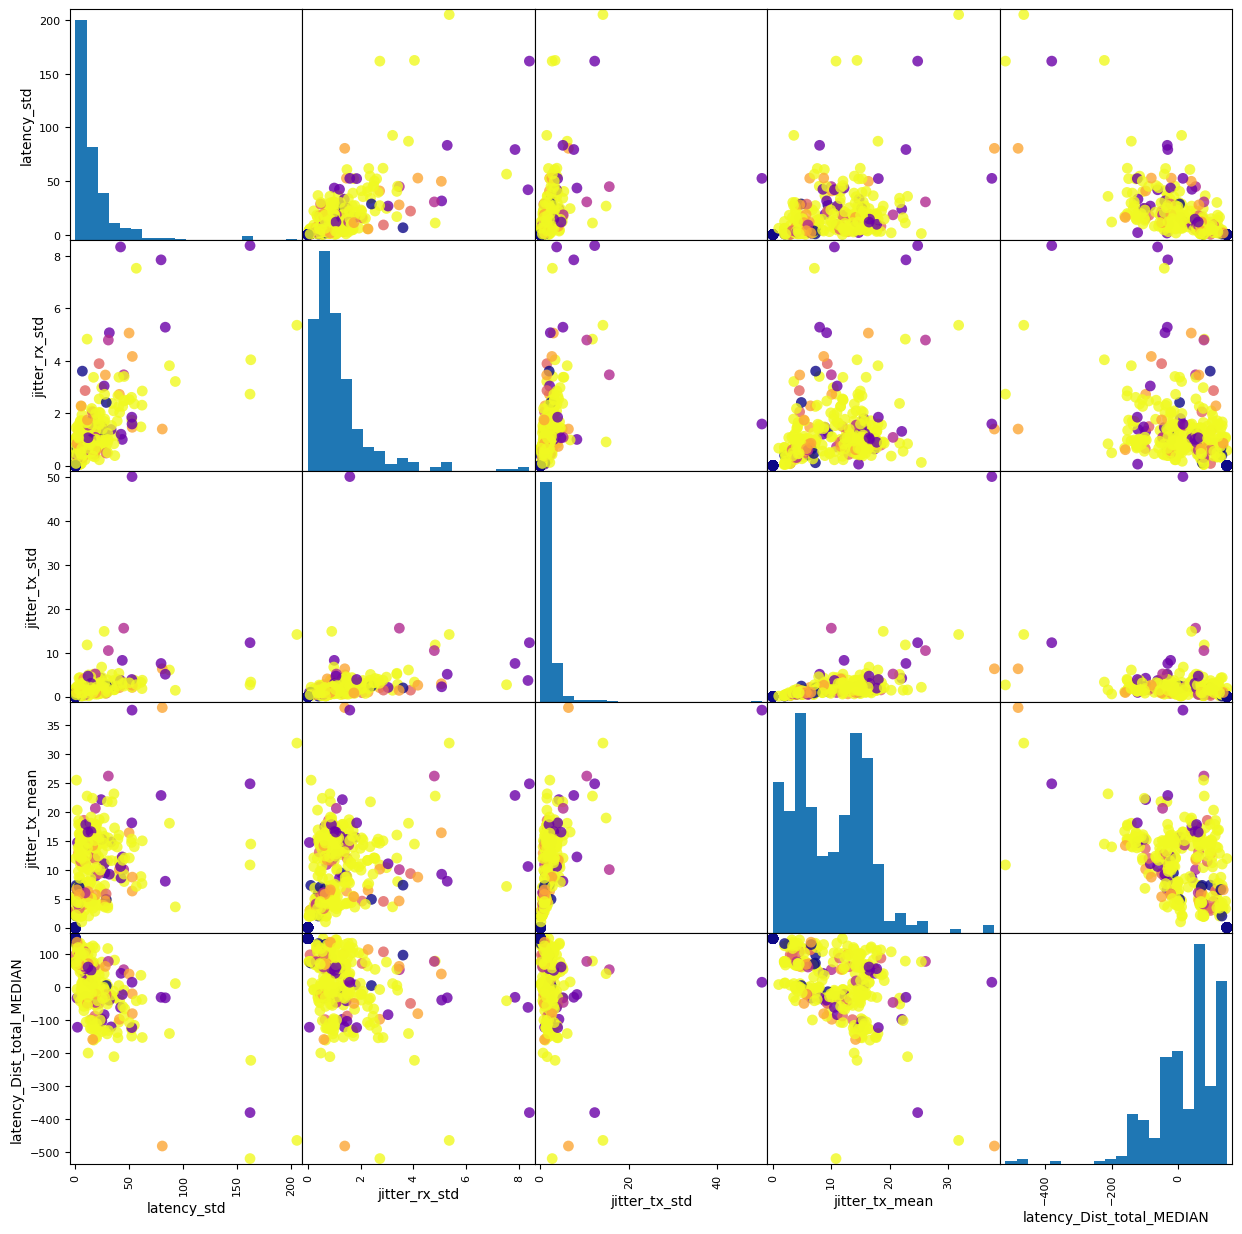

In [934]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
X_train_scatter = X_train[['latency_std',
                         'jitter_rx_std',
                         'jitter_tx_std',
                         'jitter_tx_mean',
                         'latency_Dist_total_MEDIAN']]

rating_dataframe = pd.DataFrame(X_train_scatter, columns=['latency_std',
                                                 'jitter_rx_std',
                                                 'jitter_tx_std',
                                                 'jitter_tx_mean',
                                                 'latency_Dist_total_MEDIAN'])
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(rating_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap='plasma')
plt.show()

## K Neighbors Classifiers

In [935]:
knn = KNeighborsClassifier(n_neighbors=15)

In [936]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [937]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n{}".format(y_pred))

Test set predictions:
[5. 5. 5. 5. 5. 5. 0. 5. 5. 5. 5. 5. 5. 5. 5. 1. 5. 0. 5. 0. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 0. 5. 5. 0. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 0. 5. 1. 5. 5. 1. 0. 5. 5. 5. 5. 5. 5. 0. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 0. 5. 5. 5. 5. 0. 5. 5. 5. 5. 5. 5. 5. 1. 5. 5. 1.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


In [938]:
print("TRAIN set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

TRAIN set score: 0.81
Test set score: 0.83


## Decision Tree

In [939]:
# Binarize the output
y_binary = label_binarize(y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y_binary.shape[1]
print(y_binary.shape)

(461, 6)


In [940]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [941]:
tree_classifier = DecisionTreeClassifier()
y_score = tree_classifier.fit(X_train, y_train)

print(f'Decision tree has {tree_classifier.tree_.node_count} '\
      f'nodes with maximum depth {tree_classifier.tree_.max_depth}.')

Decision tree has 155 nodes with maximum depth 25.


###### Acess Decision Tree Performance

Given the number of nodes in our decision tree and the maximum depth, we expect it has overfit to the training data. This means it will do much better on the training data than on the testing data.

In [942]:
# Make probability predictions
train_probs = tree_classifier.predict_proba(X_train)[:, 1]
probs = tree_classifier.predict_proba(X_test)[:, 1]

train_predictions = tree_classifier.predict(X_train)
predictions = tree_classifier.predict(X_test)
print('------ Test Predictions ------')
print(predictions)

------ Test Predictions ------
[3. 5. 5. 5. 1. 5. 0. 5. 5. 5. 5. 5. 4. 2. 5. 5. 5. 0. 5. 0. 5. 3. 5. 5.
 5. 4. 5. 5. 5. 5. 5. 5. 5. 3. 5. 0. 5. 1. 0. 5. 0. 5. 1. 1. 1. 5. 5. 5.
 5. 2. 5. 5. 0. 5. 5. 2. 5. 1. 0. 5. 4. 5. 1. 5. 5. 0. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 0. 5. 0. 5. 5. 5. 5. 0. 5. 5. 5. 5. 5. 5. 5. 5. 4. 5. 1.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 4. 5. 1. 5. 5.]


In [943]:
print("Train set score: {:.2f}".format(tree_classifier.score(X_train, y_train)))
print("Test set score: {:.2f}".format(tree_classifier.score(X_test, y_test)))

Train set score: 1.00
Test set score: 0.67


###### Confusion Matrix

In [944]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix_OVERRIDE(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 12)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 12)
    plt.yticks(tick_marks, classes, size = 12)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 13,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 12)
    plt.xlabel('Predicted label', size = 12)
    plt.show()

Confusion matrix, without normalization
[[10  0  1  1  0  1]
 [ 0  0  0  0  0  6]
 [ 0  1  0  1  0  2]
 [ 0  0  0  0  0  3]
 [ 0  0  1  0  0  4]
 [ 2  8  1  1  5 68]]


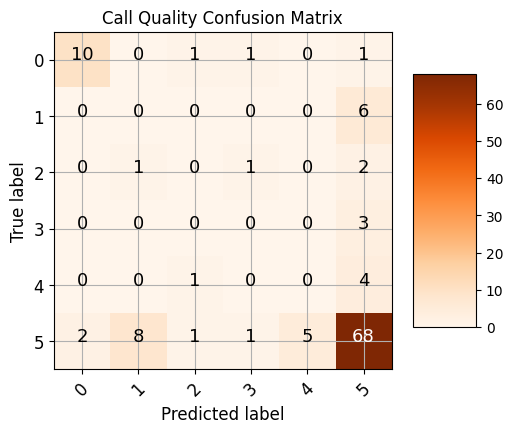

In [945]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix_OVERRIDE(cm, classes = ['0', '1', '2', '3', '4', '5'],
                      title = 'Call Quality Confusion Matrix')

###### Feature Importances

In [946]:
features = X.columns
fi = pd.DataFrame({'feature': features,
                   'importance': tree_classifier.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()

,feature,importance
15,jitter_tx_std,0.328377
22,jitter_rx_std,0.086233
36,packet_loss_rx_std,0.069188
8,latency_std,0.060278
2,duration,0.051445


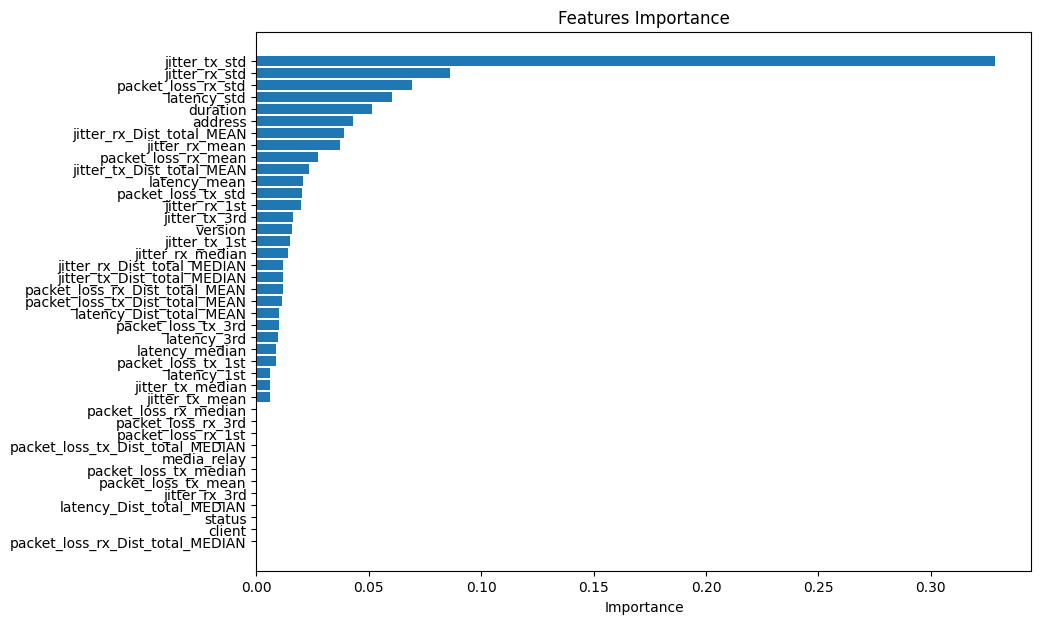

In [947]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.barh(fi.feature, fi.importance, align='center')
ax.set_yticks(fi.feature)
ax.set_yticklabels(fi.feature)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importance')
ax.set_title('Features Importance')

plt.show()

## Random Forest

In [948]:
# Create the model with 100 trees
# n_jobs: The number of jobs to run in parallel. -1 means using all processors
forest = RandomForestClassifier(n_estimators=100,  
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
forest.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, verbose=1)

In [949]:
n_nodes = []
max_depths = []

for ind_tree in forest.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 111
Average maximum depth 15


In [950]:
train_rf_predictions = forest.predict(X_train)
train_rf_probs = forest.predict_proba(X_train)[:, 1]

rf_predictions = forest.predict(X_test)
rf_probs = forest.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [951]:
print("Train set score: {:.2f}".format(forest.score(X_train, y_train)))
print("Test set score: {:.2f}".format(forest.score(X_test, y_test)))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Train set score: 1.00
Test set score: 0.82


Confusion matrix, without normalization
[[10  0  0  0  0  3]
 [ 0  0  0  0  0  6]
 [ 0  0  0  0  0  4]
 [ 0  0  0  0  0  3]
 [ 0  0  0  0  0  5]
 [ 0  0  0  0  0 85]]


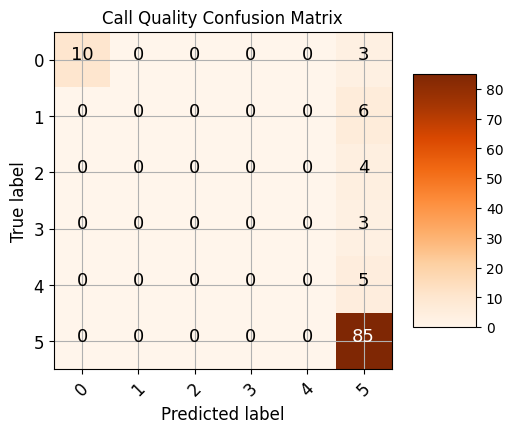

Normalized confusion matrix
[[0.77 0.   0.   0.   0.   0.23]
 [0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   1.  ]]


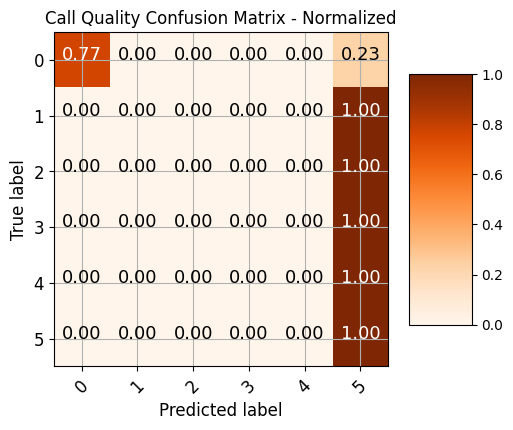

In [952]:
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix_OVERRIDE(cm, classes = ['0', '1', '2', '3', '4', '5'],
                      title = 'Call Quality Confusion Matrix')
plot_confusion_matrix_OVERRIDE(cm, classes = ['0', '1', '2', '3', '4', '5'],
                      normalize=True,
                      title = 'Call Quality Confusion Matrix - Normalized')

In [953]:
fi_model = pd.DataFrame({'feature': features,
                   'importance': forest.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10) 

,feature,importance
15,jitter_tx_std,0.079893
22,jitter_rx_std,0.058090
2,duration,0.052363
25,jitter_rx_Dist_total_MEAN,0.050830
13,jitter_tx_mean,0.040082
8,latency_std,0.038127
18,jitter_tx_Dist_total_MEAN,0.037855
20,jitter_rx_mean,0.036155
23,jitter_rx_1st,0.035851
6,latency_mean,0.030558


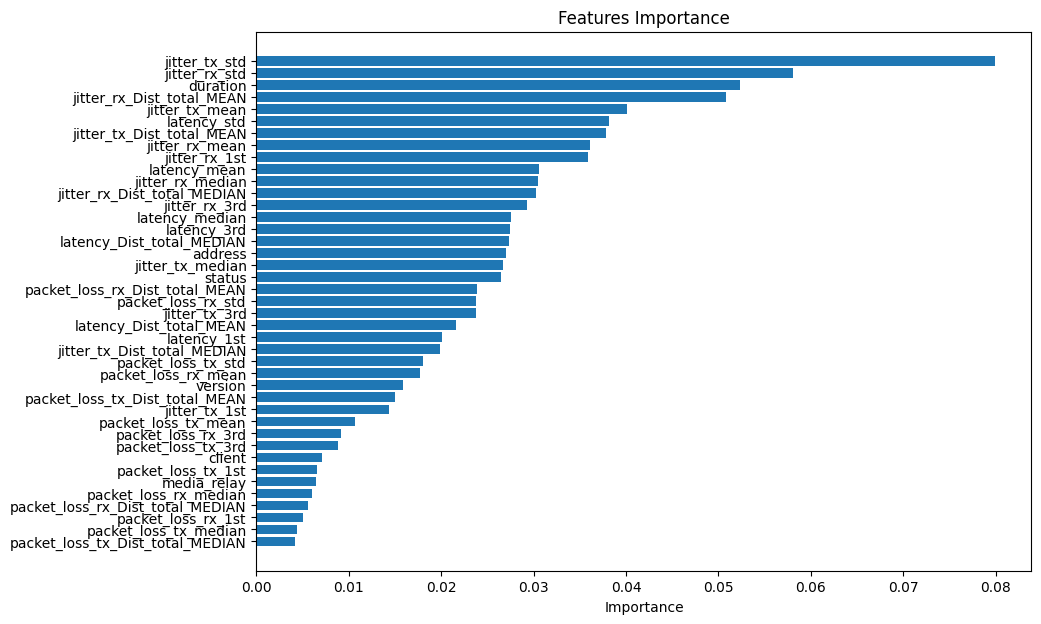

In [954]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.barh(fi_model.feature, fi_model.importance, align='center')
ax.set_yticks(fi.feature)
ax.set_yticklabels(fi.feature)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importance')
ax.set_title('Features Importance')

plt.show()

### Undersampling

Before testing other machine learning models for this dataset, it is crucial to apply some method to correct the unbalanced dataset. Since the dataset has much more calls with scores equal to 5 then the rest of the other scores. 

#### First Method - Undersampling
Delete instances from the over-represented class

In [955]:
## Let's remove scores 5 until it is only 25% larger than the second most common rating

remove_n = 250
df_ML_5 = df_ML.loc[df_ML['rating'] == 5]
df_ML_not_5 = df_ML.loc[df_ML['rating'] != 5]
drop_indices = np.random.choice(df_ML_5.index, remove_n, replace=False)
df_ML_removed = df_ML_5.drop(drop_indices)
print('5 removed - ', df_ML_removed.shape)

# df_ML_removed.merge(df_ML_not_5, left_on='rating', right_on='rating')
df_ML_removed = df_ML_removed.append(df_ML_not_5)

print('Scores not equal to 5 - ', df_ML_not_5.shape)
print('Total height - ', df_ML.shape)
print('Dataframe with 5 reduced - ', df_ML_removed.shape)
df_ML_removed.head()

5 removed -  (76, 52)
Scores not equal to 5 -  (135, 52)
Total height -  (461, 52)
Dataframe with 5 reduced -  (211, 52)


,level_0,index,call_id,version,timestamp,log_session_id,type,address,alias,media_relay,...,latency_1st,jitter_tx_1st,jitter_rx_1st,packet_loss_tx_1st,packet_loss_rx_1st,latency_3rd,jitter_tx_3rd,jitter_rx_3rd,packet_loss_tx_3rd,packet_loss_rx_3rd
1,1,0,windows_daily_standup,1,1603797308,2714f7c9-e4a7-4d5f-8b96-d1814fdf0278,1,1,fabio.ohtsuki+andfed@csghq.com,0,...,83.0,16.0,3.0,0.0,0.0,87.0,16.0,3.0,0.0,0.0
11,11,0,harvey_fabio_rogerio,4,1603803592,153061c3-4430-4a83-8116-f49912f320a1,1,4,harvey+andfed@csghq.com,0,...,170.0,16.0,10.0,0.0,0.0,170.0,16.0,10.0,0.0,0.0
25,25,0,471031,2,1603820774,80490f46f42147329e4562ffaff868a2,1,17,rogerio.richa+win@cellcrypt.com,1,...,158.0,4.0,14.0,0.0,0.0,160.0,4.0,15.0,0.0,0.0
30,30,0,windows_daily_standup,1,1603451726,d4c44e99-b16c-47c8-a820-6ee2b47286a5,1,0,fabio.ohtsuki+andfed@csghq.com,0,...,88.0,11.0,9.0,0.0,1.0,104.0,14.0,10.0,1.0,1.0
31,31,0,harvey+andfed@csghq.com,8,1601902096,ea431919-d776-452a-b879-f60d21177617,1,20,fabio.ohtsuki+andfed@csghq.com,0,...,268.0,15.0,15.0,0.0,0.0,270.0,16.0,15.0,0.0,0.0


In [956]:
df_ML_removed.groupby('rating').count()

,level_0,index,call_id,version,timestamp,log_session_id,type,address,alias,media_relay,...,latency_1st,jitter_tx_1st,jitter_rx_1st,packet_loss_tx_1st,packet_loss_rx_1st,latency_3rd,jitter_tx_3rd,jitter_rx_3rd,packet_loss_tx_3rd,packet_loss_rx_3rd
rating,,,,,,,,,,,,,,,,,,,,,
0.0,57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
1.0,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
2.0,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
3.0,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
4.0,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
5.0,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76


In [957]:
X_removed = df_ML_removed.loc[:, feature_cols]
print(X.shape)
X_removed.head()

(461, 41)


,media_relay,address,duration,client,status,version,latency_mean,latency_median,latency_std,latency_1st,...,packet_loss_tx_3rd,packet_loss_tx_Dist_total_MEAN,packet_loss_tx_Dist_total_MEDIAN,packet_loss_rx_mean,packet_loss_rx_median,packet_loss_rx_std,packet_loss_rx_1st,packet_loss_rx_3rd,packet_loss_rx_Dist_total_MEAN,packet_loss_rx_Dist_total_MEDIAN
1,0,1,340,0,7,1,84.516129,84.0,4.990922,83.0,...,0.0,0.458403,0.0,0.000000,0.0,0.000000,0.0,0.0,1.374114,0.0
11,0,4,2058,0,7,4,169.819201,170.0,6.547576,170.0,...,0.0,0.349241,0.0,0.108674,0.0,3.123398,0.0,0.0,1.265439,0.0
25,1,17,671,2,7,2,158.540984,159.0,12.418127,158.0,...,0.0,0.458403,0.0,0.000000,0.0,0.000000,0.0,0.0,1.374114,0.0
30,0,0,50,0,7,1,92.586957,93.0,21.982393,88.0,...,1.0,-0.476380,-1.0,4.195652,1.0,14.969034,1.0,1.0,-2.821538,-1.0
31,0,20,1069,0,7,8,268.260456,269.0,16.785903,268.0,...,0.0,0.458403,0.0,0.190114,0.0,4.358132,0.0,0.0,1.184000,0.0


In [958]:
y_removed = df_ML_removed.rating
print(y.shape)
y_removed.head()

(461,)


1     5.0
11    5.0
25    5.0
30    5.0
31    5.0
Name: rating, dtype: float64

In [959]:
X_train_removed, X_test_removed, y_train_removed, y_test_removed =\
            train_test_split(X_removed, y_removed, random_state=0)

print("X_train shape: {}".format(X_train_removed.shape))
print("X_test shape: {}".format(X_test_removed.shape))
print("y_train shape: {}".format(y_train_removed.shape))
print("y_test shape: {}".format(y_test_removed.shape))
print('Total: ', X_train_removed.shape[0] +\
      X_test_removed.shape[0] +\
      y_train_removed.shape[0] +\
      y_test_removed.shape[0])

X_train shape: (158, 41)
X_test shape: (53, 41)
y_train shape: (158,)
y_test shape: (53,)
Total:  422


### Scatter Matrix

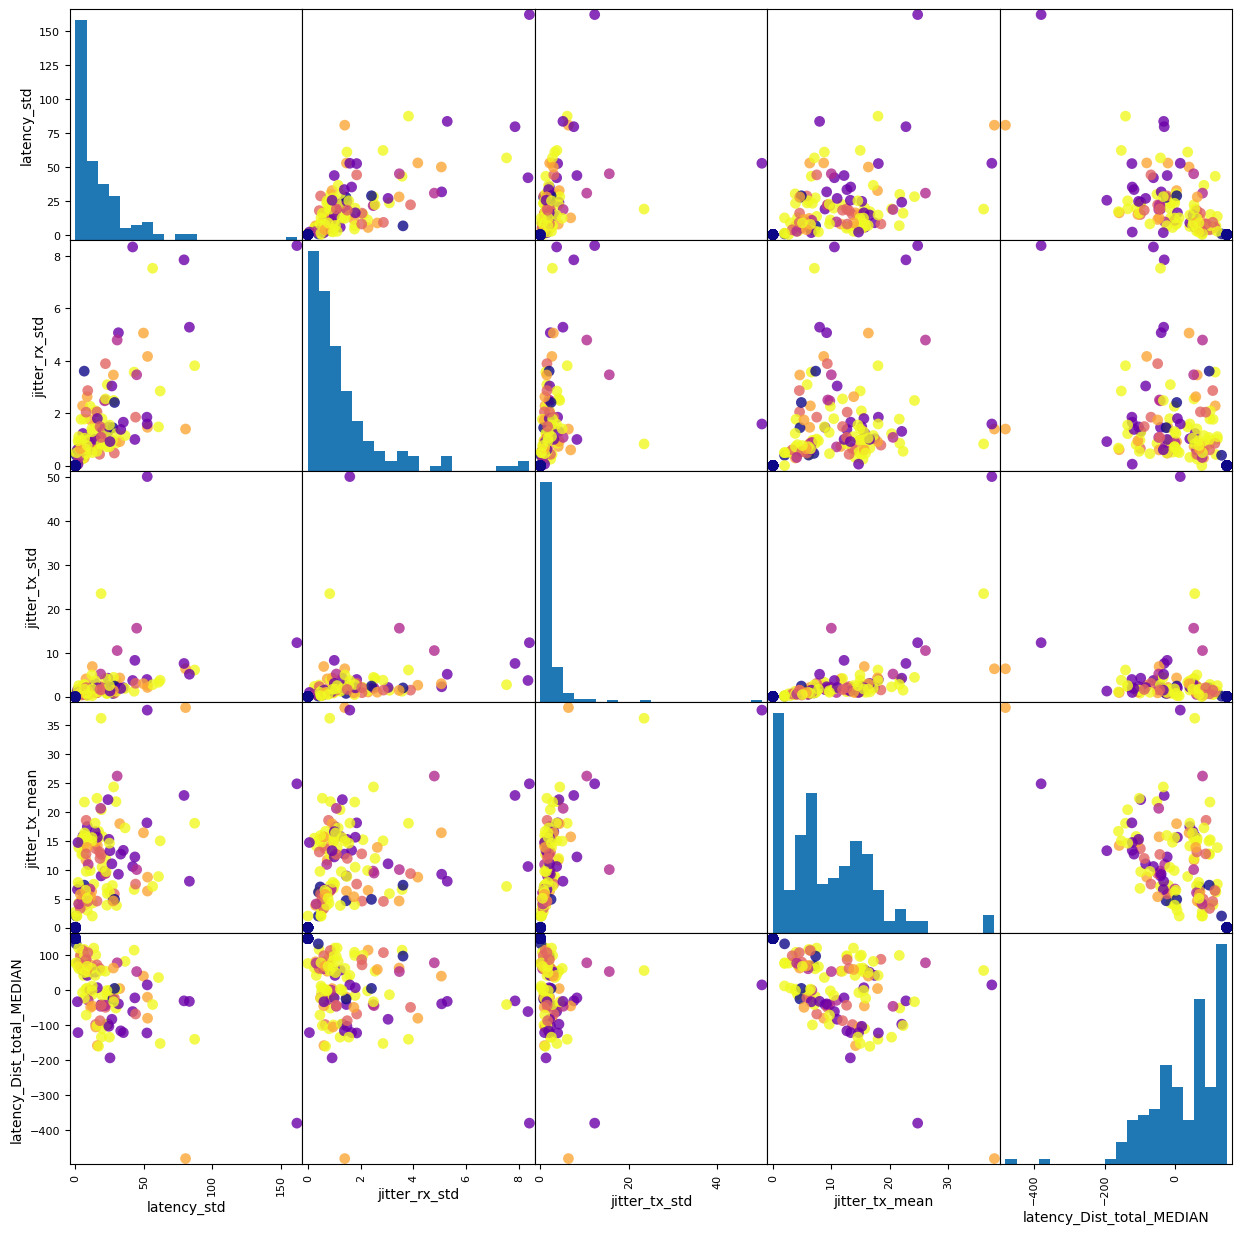

In [962]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
X_train_scatter_removed = X_train_removed[['latency_std',
                         'jitter_rx_std',
                         'jitter_tx_std',
                         'jitter_tx_mean',
                         'latency_Dist_total_MEDIAN']]

rating_dataframe_removed = pd.DataFrame(X_train_scatter_removed, columns=['latency_std',
                                                 'jitter_rx_std',
                                                 'jitter_tx_std',
                                                 'jitter_tx_mean',
                                                 'latency_Dist_total_MEDIAN'])
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(rating_dataframe_removed, c=y_train_removed, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap='plasma')
plt.show()

### Random Forest with modified data

In [963]:
# Fit on training data
forest.fit(X_train_removed, y_train_removed)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, verbose=1)

In [964]:
n_nodes = []
max_depths = []

for ind_tree in forest.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 76
Average maximum depth 11


In [965]:
train_rf_predictions = forest.predict(X_train)
train_rf_probs = forest.predict_proba(X_train)[:, 1]

rf_predictions = forest.predict(X_test)
rf_probs = forest.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [966]:
print("Train set score: {:.2f}".format(forest.score(X_train, y_train)))
print("Test set score: {:.2f}".format(forest.score(X_test, y_test)))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Train set score: 0.83
Test set score: 0.82


Confusion matrix, without normalization
[[11  1  0  0  0  1]
 [ 0  4  1  0  0  1]
 [ 0  0  3  0  0  1]
 [ 0  0  0  3  0  0]
 [ 0  0  0  1  4  0]
 [ 1  9  0  0  5 70]]


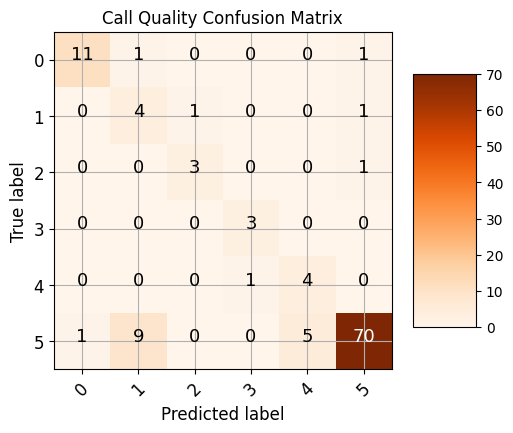

Normalized confusion matrix
[[0.85 0.08 0.   0.   0.   0.08]
 [0.   0.67 0.17 0.   0.   0.17]
 [0.   0.   0.75 0.   0.   0.25]
 [0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.2  0.8  0.  ]
 [0.01 0.11 0.   0.   0.06 0.82]]


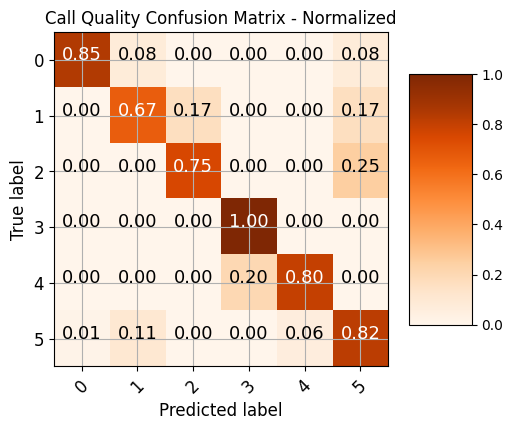

In [967]:
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix_OVERRIDE(cm, classes = ['0', '1', '2', '3', '4', '5'],
                      title = 'Call Quality Confusion Matrix')
plot_confusion_matrix_OVERRIDE(cm, classes = ['0', '1', '2', '3', '4', '5'],
                      normalize=True,
                      title = 'Call Quality Confusion Matrix - Normalized')

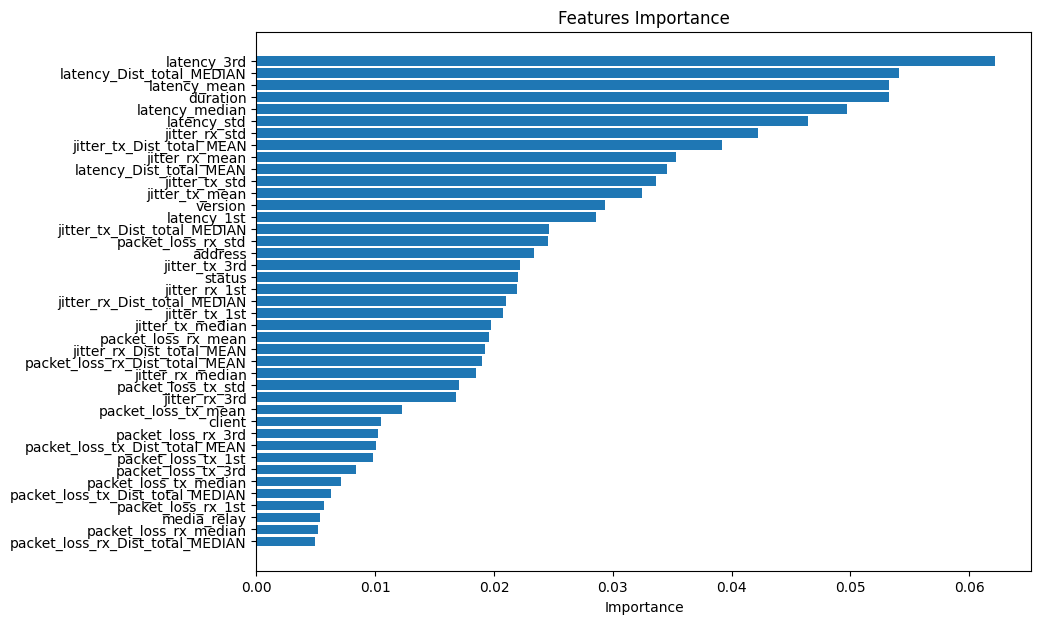

In [968]:
fi_model = pd.DataFrame({'feature': features,
                   'importance': forest.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10) 

fig, ax = plt.subplots(figsize=(10, 7))

ax.barh(fi_model.feature, fi_model.importance, align='center')
ax.set_yticks(fi.feature)
ax.set_yticklabels(fi.feature)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importance')
ax.set_title('Features Importance')

plt.show()

## Receiver Operating Characteristic (ROC)

In [61]:
# Binarize the output
y_binary = label_binarize(y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y_binary.shape[1]
print(y.shape)

(414,)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, random_state=0)

In [63]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

###### One-VS-Rest
In this approach, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are calsses. 

In [64]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [65]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

It is crucial to note that performance in the far left-hand side of the ROC graph is more interesting in the point of view of a more True Positive Data Set than False Positive 

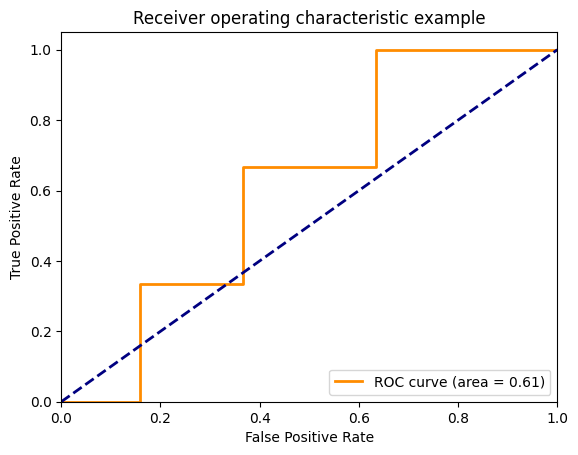

In [66]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

/Users/igorlimarochaazevedo/Documents/Cellcrypt/machineLearningCallEvaluation/venv_ML_CSG/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



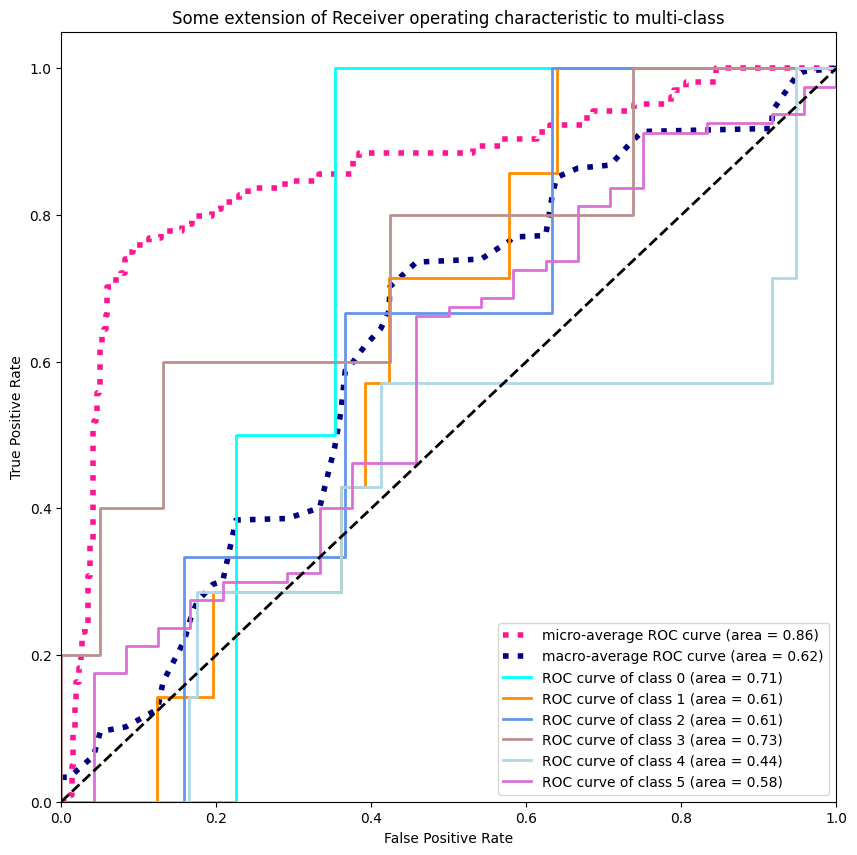

In [67]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'rosybrown', 'lightblue', 'orchid'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## Support Vector Machines

In [68]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
class_names = ['0', '1', '2', '3', '4', '5']

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=100).fit(X_train, y_train)

Confusion matrix, without normalization
[[ 0  0  1  0  0  1]
 [ 0  0  1  0  0  6]
 [ 1  0  0  0  0  2]
 [ 1  1  0  0  0  3]
 [ 4  1  0  0  0  2]
 [ 7  7  4  2  2 58]]
Normalized confusion matrix
[[0.   0.   0.5  0.   0.   0.5 ]
 [0.   0.   0.14 0.   0.   0.86]
 [0.33 0.   0.   0.   0.   0.67]
 [0.2  0.2  0.   0.   0.   0.6 ]
 [0.57 0.14 0.   0.   0.   0.29]
 [0.09 0.09 0.05 0.03 0.03 0.72]]


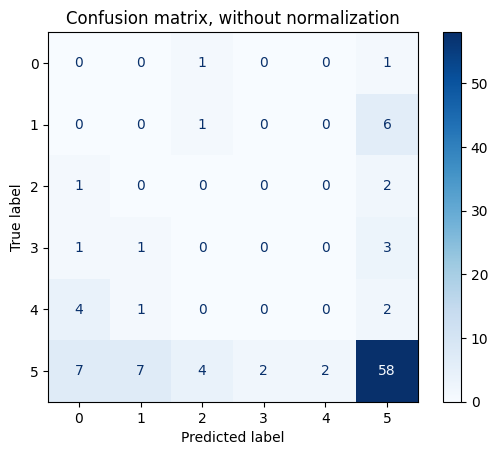

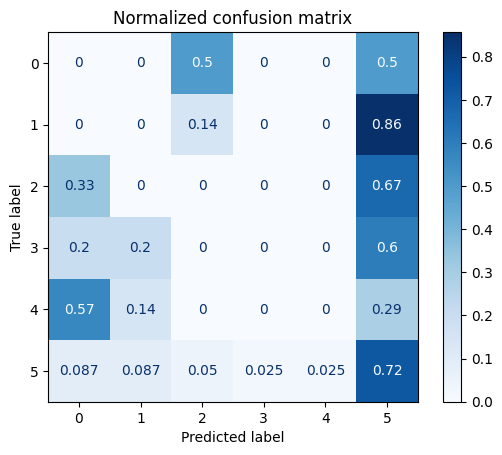

In [69]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [70]:
print("Train set score: {:.2f}".format(classifier.score(X_train, y_train)))
print("Test set score: {:.2f}".format(classifier.score(X_test, y_test)))

Train set score: 0.83
Test set score: 0.56
